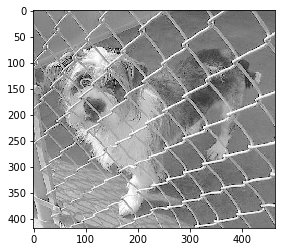

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

#pip install opencv-python

DATADIR = "./../datasets/kagglecatsanddogs/PetImages"
CATEGORIES = ["Dog", "Cat"] # 0 - Dog; 1 - Cat

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to cats or dogs dir ex. ./../datasets/kagglecatsanddogs/PetImages/Dog
    for img in os.listdir(path): # ex. img == 7949.jpg
        
        # konwerujemy zdjęcia na szare
        # poniewaz zajmuje mniej miejsca
        # poniewaz kolor nie definiuje czy jest to kot czy pies
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        
        # show dog,cat
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break


In [2]:
print(img_array)
print("\n Kształt tablicy ze zdjęciami: \n")
print(img_array.shape)

[[191 251 159 ..., 106 115 122]
 [244 184  81 ..., 110 115 120]
 [227 128  91 ..., 112 113 114]
 ..., 
 [234 239 237 ..., 127 112 121]
 [240 231 226 ..., 129 122 125]
 [240 231 226 ..., 128 120 123]]

 Kształt tablicy ze zdjęciami: 

(418, 464)


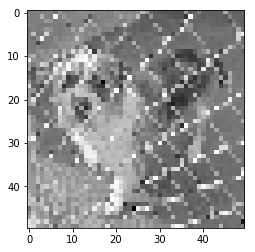

In [3]:
# jako że zdjęcia mają różną wielkość skalujemy je to tej samej rozdzielczości

IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(new_array, cmap="gray")
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category) # 0 - Dog; 1 - Cat
        print(class_num)
        for img in os.listdir(path):
            try: #dodajemy try ponieważ niektóre pliki są zepsute
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # konwertujemy na szare zdjęcia
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # skalujemy zdjęcia do tego same rozmiaru
                training_data.append([new_array, class_num]) # wrzucamy skonwertowane zdjęcia do nowej tablicy
            except Exception as e:
                pass
        
create_training_data()        

0
1


In [5]:
print(len(training_data))


# print(training_data[4][1]) # - label 4 zdjecia

# print(len(training_data[1][0][49])) # - sprawdzamy czy tablica 1 zdjecia na wielkosc 50x50

# print(training_data[:10])

# [[array([[135, 136, 141, ..., 108, 105, 113],
#        [135, 134, 135, ..., 112, 111, 110],
#        [...]])],

# TIP:
# Najlepiej jest mieć dane treningowe podzielone po równo
# Czyli 50% psów, 50% kotów, inaczej AI może mieć problemy z klasyfikacją klasy która ma mniej zdjęć
# Ponieważ gdy np. mamy 75% psów, 25% kotów, najpierw nauczy się jak dobrze rozpoznawać psy, a gdy będzie chciał
# rozpoznać koty będzie miał z tym problem

24946


In [6]:
import random

# Ponieważ iterujemy po kategoriach najlepiej jest wymieszać dane
# Aby AI nie przewidywała najpierw wszystkiego jako psy (to jest pies, to jest pies, to jest pies, itd.), 
# a gdy dojdziemy do kategorii kotów aby nie przewidywała wszystkiego jako kot (to jest kot, to jest kot, itd.)
# a nastepnie znowu (to jest pies, to jest pies, itd.) i robi taki ping-pong

random.shuffle(training_data)


# Sprawdzamy czy wiemieszało nam dane

for sample in training_data[:5]:
    print(sample[1])

1
1
0
1
1


In [11]:
X = [] # generalnie duże X jest datasetem z atrybutami (featurami)
y = [] # małe y jest datasetem z labelami - z nazwami kategorii/klasy


# Tworzymy tablice z atrybutami i labelami

for features, label in training_data:
    X.append(features)
    y.append(label)
    
    
# Atrybuty muszą być tablicą numpy!!!

# Konwertuje z postaci
#   [ [ 81  72  89  8 .. 131 136 141] , [ 81  72  89  8 .. 131 136 141], ... ]
# na  
#   [ [[ 81] [ 72] [ 89] [ ...] [ 131] [ 136] [141]] , [[ 81] [ 72] [ 89] [ ...] [ 131] [ 136] [141]], ... ]


# -1 - złapie nam wszystkie atrybuty w tablicy (czyli chyba, weź wszystkie (pod)tablice jakie są)
# IMG_SIZE czyli 50 - bo taki mamy rozmiar zdjęcia
# IMG_SIZE czyli 50 - bo taki mamy rozmiar zdjęcia
# 1 - bo mamy zdjęcie czarnobiałe, czyli 1 kolorowe

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # jeżeli chcemy korzystać z kolorowych zdjęć zmieniamy 1 na 3 (bo mamy 3 kolory)


In [12]:
# Aby za każdym razem nie tworzyć dataseta od nowa zapisujemy go
# numpy.save ?? - można też użyć

import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
# Później aby odczytać dane

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X[1]

array([[[  6],
        [  1],
        [  1],
        ..., 
        [  1],
        [  1],
        [  1]],

       [[  8],
        [  0],
        [  1],
        ..., 
        [  7],
        [  3],
        [  2]],

       [[  7],
        [  2],
        [  1],
        ..., 
        [ 20],
        [ 11],
        [  6]],

       ..., 
       [[158],
        [158],
        [161],
        ..., 
        [139],
        [134],
        [123]],

       [[159],
        [167],
        [159],
        ..., 
        [142],
        [131],
        [120]],

       [[154],
        [158],
        [161],
        ..., 
        [113],
        [120],
        [116]]], dtype=uint8)